In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.nn as nn
from torchvision.models import resnet50, inception_v3, densenet121, mobilenet_v2, convnext_tiny
import torch.optim as optim
from torch_funcs import inception_fit, fit, test, get_cifar10_loaders, get_mnist_loaders, FullyConnectedNet

In [2]:
# config
batch_size = 32
test_batch_size = 64
epochs = 2
lr = 1e-3
momentum = 0.9
loss_func = F.cross_entropy
num_classes = 10
log_interval = 300

use_cuda = torch.cuda.is_available()
device = torch.device("cuda"
                      if use_cuda
											else "cpu"
										)
print(f'CUDA enabled: {use_cuda}')

train_dl, test_dl = get_cifar10_loaders(batch_size, test_batch_size)

CUDA enabled: True
Files already downloaded and verified
Files already downloaded and verified


Important thing to remember here is that basically no nets can work on CIFAR-10 dataset direclty as 32x32 images are too
small. That's why `get_cifar10_loaders` internally resizes all pictures to (by default) 224x224 pixels to meet the
requirements as suggested
[here](https://discuss.pytorch.org/t/given-input-size-256x1x1-calculated-output-size-256x0x0/40941). 
  
This input transform shall be repeated for all technologies examined in this paper.

In [3]:
def whole_thing(predef_model):
	opt = optim.SGD(predef_model.parameters(), lr=lr, momentum=momentum)

	train_history = []
	acc_history = []

	for epoch in range(1, epochs + 1):
		train_history.extend( fit(predef_model, device, train_dl, loss_func, epoch, optimizer=opt, log_interval=log_interval, silent=False) )
		acc_history.append( test(predef_model, device, test_dl, loss_func, silent=True) )

	fig, (ax1, ax2) = plt.subplots(1, 2)
	fig.set_size_inches(12.8, 4.8)

	ax1.plot(train_history)
	ax1.set_title('Training history')

	ax2.plot(acc_history)
	ax2.set_title('Accuracy history')

	del opt, train_history, acc_history

ResNet50 - 2015
Train Epoch: 1 -> batch: 299 [9568/50000 (19%)]	Loss: 2.461671
Train Epoch: 1 -> batch: 599 [19168/50000 (38%)]	Loss: 2.222507
Train Epoch: 1 -> batch: 899 [28768/50000 (58%)]	Loss: 2.025565
Train Epoch: 1 -> batch: 1199 [38368/50000 (77%)]	Loss: 1.939317
Train Epoch: 1 -> batch: 1499 [47968/50000 (96%)]	Loss: 1.836743
Train Epoch: 2 -> batch: 299 [9568/50000 (19%)]	Loss: 1.732610
Train Epoch: 2 -> batch: 599 [19168/50000 (38%)]	Loss: 1.692755
Train Epoch: 2 -> batch: 899 [28768/50000 (58%)]	Loss: 1.677883
Train Epoch: 2 -> batch: 1199 [38368/50000 (77%)]	Loss: 1.627137
Train Epoch: 2 -> batch: 1499 [47968/50000 (96%)]	Loss: 1.603500


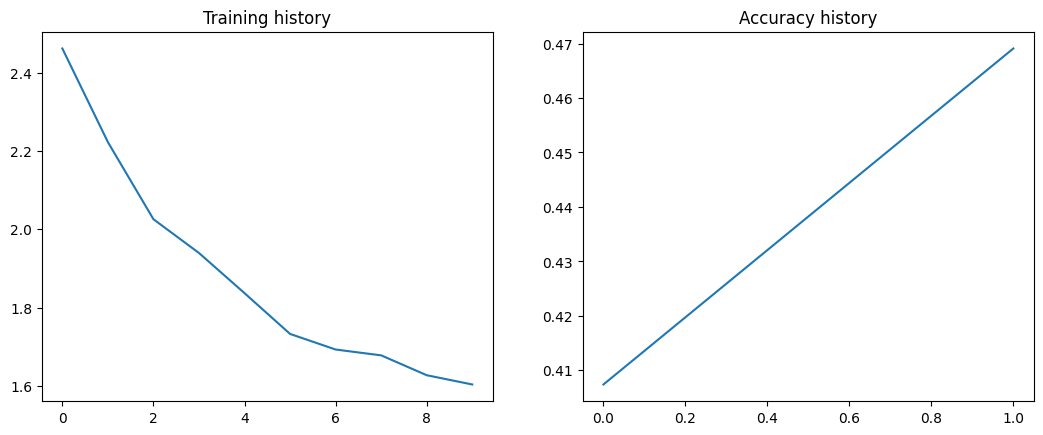

In [4]:
print('ResNet50 - 2015')

model = resnet50()
model.fc = nn.Linear(in_features=2048, out_features=num_classes, bias=True)
model = model.to(device)

whole_thing(model) 

del model # explicit deletion as GC doesn't seem to free VRAM

Inception v3 - 2016
Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 -> batch: 299 [897/50000 (2%)]	Loss: 3.462979
Train Epoch: 1 -> batch: 599 [1797/50000 (4%)]	Loss: 3.370570
Train Epoch: 1 -> batch: 899 [2697/50000 (5%)]	Loss: 3.268029
Train Epoch: 1 -> batch: 1199 [3597/50000 (7%)]	Loss: 3.177039
Train Epoch: 1 -> batch: 1499 [4497/50000 (9%)]	Loss: 3.167922
Train Epoch: 1 -> batch: 1799 [5397/50000 (11%)]	Loss: 3.055721
Train Epoch: 1 -> batch: 2099 [6297/50000 (13%)]	Loss: 3.029802
Train Epoch: 1 -> batch: 2399 [7197/50000 (14%)]	Loss: 3.027698
Train Epoch: 1 -> batch: 2699 [8097/50000 (16%)]	Loss: 2.993467
Train Epoch: 1 -> batch: 2999 [8997/50000 (18%)]	Loss: 2.915188
Train Epoch: 1 -> batch: 3299 [9897/50000 (20%)]	Loss: 2.953030
Train Epoch: 1 -> batch: 3599 [10797/50000 (22%)]	Loss: 2.899972
Train Epoch: 1 -> batch: 3899 [11697/50000 (23%)]	Loss: 2.933024
Train Epoch: 1 -> batch: 4199 [12597/50000 (25%)]	Loss: 2.801953
Train Epoch: 1

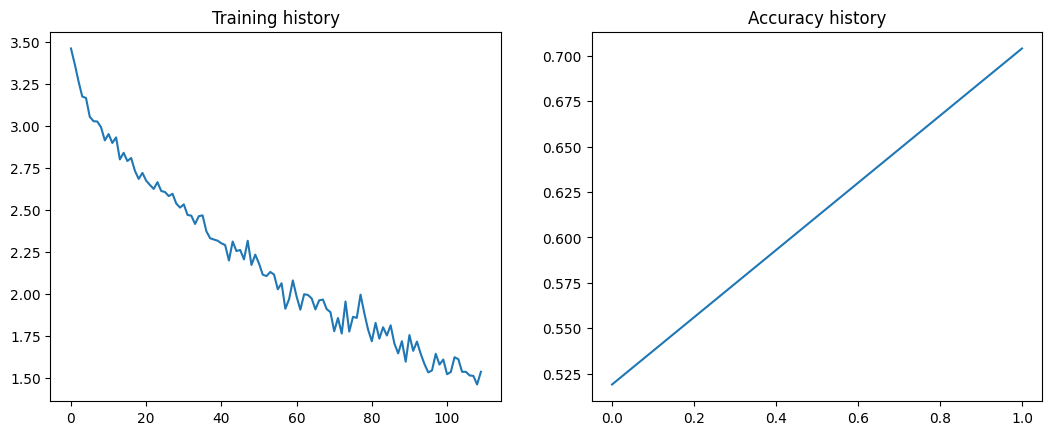

In [3]:
print('Inception v3 - 2016')

model = inception_v3(init_weights=False)
model.AuxLogits.fc = nn.Linear(in_features=768, out_features=num_classes, bias=True)
model.fc = nn.Linear(in_features=2048, out_features=num_classes, bias=True)
model = model.to(device)

inception_batch_size = 3
inception_test_batch_size = 6

inception_train_dl, inception_test_dl = get_cifar10_loaders(inception_batch_size, inception_test_batch_size, 299)
opt = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_history = []
acc_history = []

for epoch in range(1, epochs + 1):
	train_history.extend( inception_fit(model, device, inception_train_dl, loss_func, epoch, opt, log_interval=log_interval, silent=False) )
	acc_history.append( test(model, device, inception_test_dl, loss_func, silent=True) )

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12.8, 4.8)

ax1.plot(train_history)
ax1.set_title('Training history')

ax2.plot(acc_history)
ax2.set_title('Accuracy history')

del model, opt, train_history, acc_history, inception_train_dl, inception_test_dl

Densenet121 - 2018
Train Epoch: 1 -> batch: 299 [9568/50000 (19%)]	Loss: 1.955830
Train Epoch: 1 -> batch: 599 [19168/50000 (38%)]	Loss: 1.668429
Train Epoch: 1 -> batch: 899 [28768/50000 (58%)]	Loss: 1.566323
Train Epoch: 1 -> batch: 1199 [38368/50000 (77%)]	Loss: 1.519510
Train Epoch: 1 -> batch: 1499 [47968/50000 (96%)]	Loss: 1.451191
Train Epoch: 2 -> batch: 299 [9568/50000 (19%)]	Loss: 1.371967
Train Epoch: 2 -> batch: 599 [19168/50000 (38%)]	Loss: 1.338328
Train Epoch: 2 -> batch: 899 [28768/50000 (58%)]	Loss: 1.316590
Train Epoch: 2 -> batch: 1199 [38368/50000 (77%)]	Loss: 1.295277
Train Epoch: 2 -> batch: 1499 [47968/50000 (96%)]	Loss: 1.252145


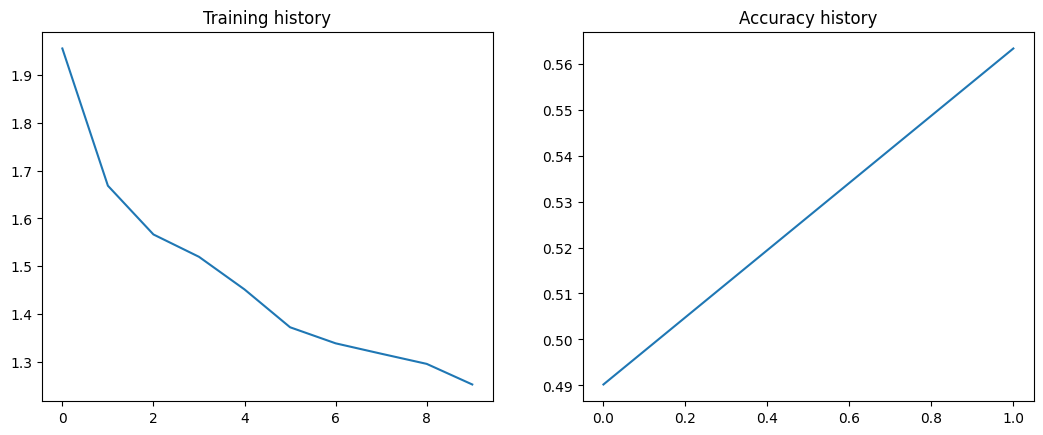

In [6]:
print('Densenet121 - 2018')

model = densenet121()
model.classifier = nn.Linear(in_features=1024, out_features=num_classes, bias=True)
model = model.to(device)

whole_thing(model)

del model

MobileNet v2 - 2019
Train Epoch: 1 -> batch: 299 [9568/50000 (19%)]	Loss: 2.277623
Train Epoch: 1 -> batch: 599 [19168/50000 (38%)]	Loss: 2.063098
Train Epoch: 1 -> batch: 899 [28768/50000 (58%)]	Loss: 1.934200
Train Epoch: 1 -> batch: 1199 [38368/50000 (77%)]	Loss: 1.857117
Train Epoch: 1 -> batch: 1499 [47968/50000 (96%)]	Loss: 1.819660
Train Epoch: 2 -> batch: 299 [9568/50000 (19%)]	Loss: 1.757937
Train Epoch: 2 -> batch: 599 [19168/50000 (38%)]	Loss: 1.709884
Train Epoch: 2 -> batch: 899 [28768/50000 (58%)]	Loss: 1.692842
Train Epoch: 2 -> batch: 1199 [38368/50000 (77%)]	Loss: 1.658800
Train Epoch: 2 -> batch: 1499 [47968/50000 (96%)]	Loss: 1.653335


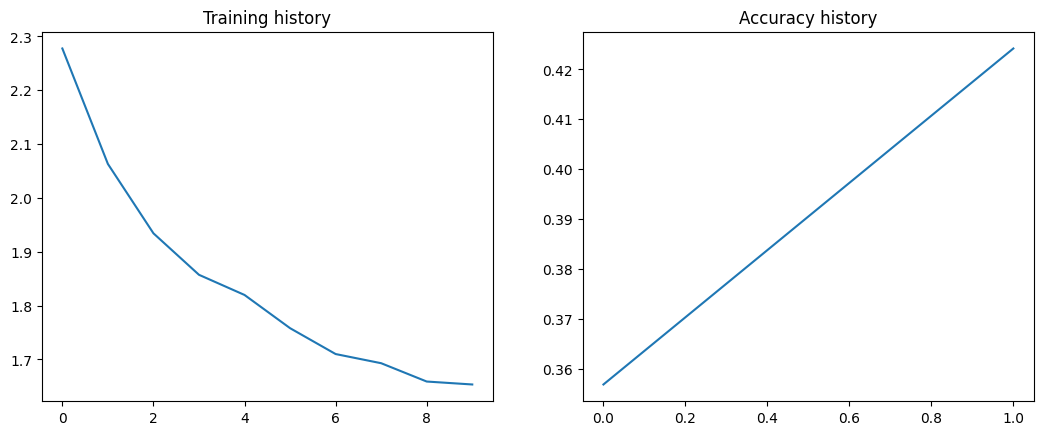

In [7]:
print('MobileNet v2 - 2019')

model = mobilenet_v2()
model.classifier[1] = nn.Linear(in_features=1280, out_features=num_classes, bias=True)
model = model.to(device)

whole_thing(model)

del model

ConvNeXt - 2020
Train Epoch: 1 -> batch: 299 [9568/50000 (19%)]	Loss: 1.883336
Train Epoch: 1 -> batch: 599 [19168/50000 (38%)]	Loss: 1.770920
Train Epoch: 1 -> batch: 899 [28768/50000 (58%)]	Loss: 1.689951
Train Epoch: 1 -> batch: 1199 [38368/50000 (77%)]	Loss: 1.675601
Train Epoch: 1 -> batch: 1499 [47968/50000 (96%)]	Loss: 1.652706
Train Epoch: 2 -> batch: 299 [9568/50000 (19%)]	Loss: 1.604157
Train Epoch: 2 -> batch: 599 [19168/50000 (38%)]	Loss: 1.603663
Train Epoch: 2 -> batch: 899 [28768/50000 (58%)]	Loss: 1.605348
Train Epoch: 2 -> batch: 1199 [38368/50000 (77%)]	Loss: 1.576739
Train Epoch: 2 -> batch: 1499 [47968/50000 (96%)]	Loss: 1.589906


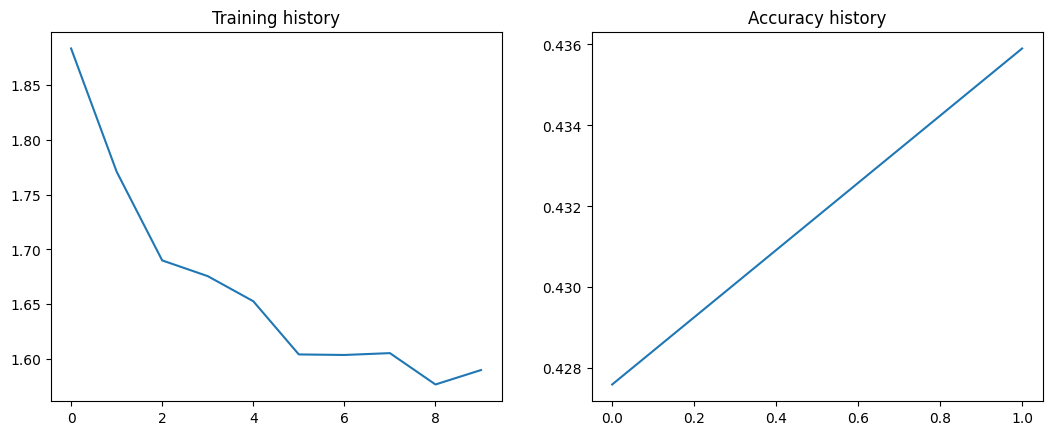

In [8]:
print('ConvNeXt - 2020')

model = convnext_tiny()
model.classifier[2] = nn.Linear(in_features=768, out_features=num_classes, bias=True)
model = model.to(device)

whole_thing(model)

del model

Fully connected MLP - Simard et al. 2003
Train Epoch: 1 -> batch: 399 [25536/60000 (43%)]	Loss: 0.700304
Train Epoch: 1 -> batch: 799 [51136/60000 (85%)]	Loss: 0.398001
Train Epoch: 2 -> batch: 399 [25536/60000 (43%)]	Loss: 0.313361
Train Epoch: 2 -> batch: 799 [51136/60000 (85%)]	Loss: 0.286394
Train Epoch: 3 -> batch: 399 [25536/60000 (43%)]	Loss: 0.238923
Train Epoch: 3 -> batch: 799 [51136/60000 (85%)]	Loss: 0.225106
Train Epoch: 4 -> batch: 399 [25536/60000 (43%)]	Loss: 0.201979
Train Epoch: 4 -> batch: 799 [51136/60000 (85%)]	Loss: 0.179678
Train Epoch: 5 -> batch: 399 [25536/60000 (43%)]	Loss: 0.167159
Train Epoch: 5 -> batch: 799 [51136/60000 (85%)]	Loss: 0.154640


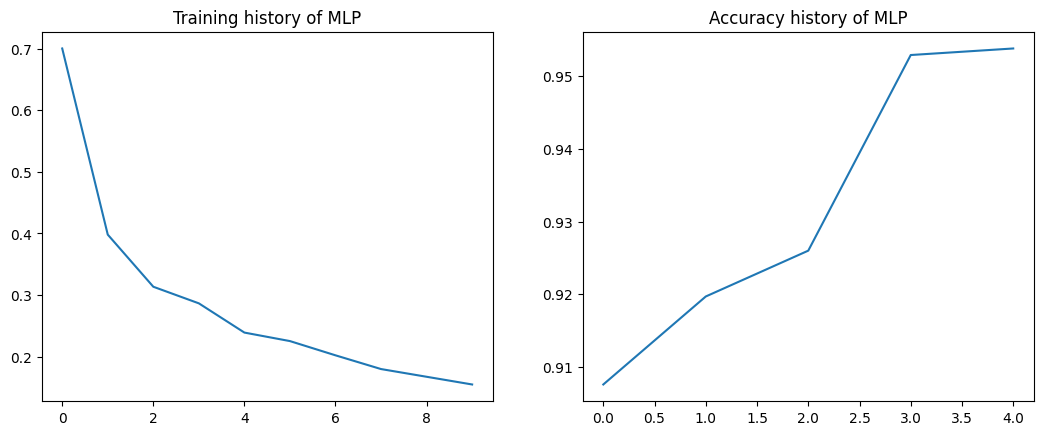

In [9]:
# config
fc_batch_size = 64
fc_test_batch_size = 128
epochs = 5
lr = 1e-2
momentum = 0.9
log_interval = 400
loss_func = F.nll_loss # FCNet returns log_softmax -> with nll eq to cross entropy

train_dl, _, test_dl = get_mnist_loaders(fc_batch_size, fc_test_batch_size)

model = FullyConnectedNet().to(device)
opt = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_history = []
acc_history = []

print('Fully connected MLP - Simard et al. 2003')
for epoch in range(1, epochs + 1):
	train_history.extend( fit(model, device, train_dl, loss_func, epoch, opt, log_interval=log_interval, silent=False) )
	acc_history.append( test(model, device, test_dl, loss_func, silent=True) )

fig, (ax_train, ax_test) = plt.subplots(1, 2)
fig.set_size_inches(12.8, 4.8)

ax_train.plot(train_history)
ax_test.plot(acc_history)
ax_train.set_title('Training history of MLP')
ax_test.set_title('Accuracy history of MLP')

del model, opt, train_history, acc_history